In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
features = pd.read_csv('C:/Users/divya/Retail_Store_Analytics/features.csv')
sales = pd.read_csv('C:/Users/divya/Retail_Store_Analytics/sales.csv')
stores = pd.read_csv('C:/Users/divya/Retail_Store_Analytics/stores.csv')

In [4]:
print(features.shape)
print(sales.shape)
print(stores.shape)

(8190, 12)
(421570, 5)
(45, 3)


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [7]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
df = sales.merge(features, how = 'left', on = ['Store','Date','IsHoliday'])
df = df.merge(stores, how = 'left', on = ['Store'])

In [9]:
df.shape

(421570, 16)

In [10]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [11]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [12]:
#check missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum())/(df.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total','Percent'])
missing_data

,Total,Percent
MarkDown2,310322,73.611025
MarkDown4,286603,67.984676
MarkDown3,284479,67.480845
MarkDown1,270889,64.257181
MarkDown5,270138,64.079038
Size,0,0.000000
Type,0,0.000000
Unemployment,0,0.000000
CPI,0,0.000000
Fuel_Price,0,0.000000


In [13]:
df = df.fillna(0)

In [14]:
#Apply transformations to the date column
def date_transform(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.day
    df['DayofWeekNum'] = df['Date'].dt.weekday
    df['DayofWeek'] = df['Date'].dt.strftime('%A')
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    return df


df = date_transform(df)

In [15]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Type,Size,Day,DayofWeekNum,DayofWeek,Month,Year
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,A,151315,2,6,Sunday,5,2010
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,0.0,211.242170,8.106,A,151315,2,3,Thursday,12,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,0.0,211.289143,8.106,A,151315,19,4,Friday,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,0.0,211.319643,8.106,A,151315,26,4,Friday,2,2010
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,0.0,211.350143,8.106,A,151315,3,0,Monday,5,2010


# Weekly Sales Trend over Time

In [16]:
avg_sales_store_monthly = df[['Year','Month','Weekly_Sales']].groupby(['Year','Month']).agg({'Weekly_Sales':'mean'}).reset_index()
avg_sales_store_monthly.head()

,Year,Month,Weekly_Sales
0,2010,1,14391.780535
1,2010,2,16244.436211
2,2010,3,15828.833079
3,2010,4,15701.015586
4,2010,5,15971.989499


In [17]:
pivot_df = avg_sales_store_monthly.pivot(index='Month', columns='Year', values='Weekly_Sales')
pivot_df.head()

Year,2010,2011,2012
Month,,,
1,14391.780535,14471.611234,14570.279140
2,16244.436211,15872.183056,15944.362413
3,15828.833079,15490.811225,15558.979707
4,15701.015586,15762.759190,15390.168452
5,15971.989499,15524.557693,16040.929182


C:\Users\divya\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\divya\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\divya\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


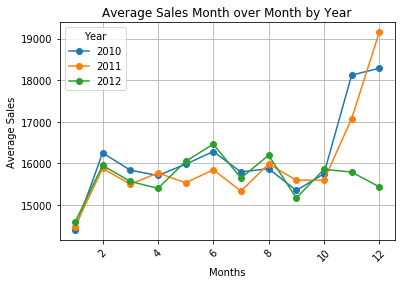

In [18]:
#plt.figure(figsize=(15,6))
for year in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[year], marker = 'o', label = f'{year}')
plt.xlabel('Months')
plt.ylabel('Average Sales')
plt.title('Average Sales Month over Month by Year')
plt.xticks(rotation = 45)
plt.grid(visible = True)
plt.legend(title = 'Year')

Sales show a peak during the holiday peak from October to December and also a peak during the summer months

In [19]:
date_insights = df[['Date','Weekly_Sales','Fuel_Price','Temperature','CPI','Unemployment']]
date_insights = date_insights.groupby('Date').agg({'Weekly_Sales':'mean','Fuel_Price':'mean','Temperature':'mean','CPI':'mean','Unemployment':'mean'})

date_insights.head()

,Weekly_Sales,Fuel_Price,Temperature,CPI,Unemployment
Date,,,,,
2010-01-10,14391.780535,2.733064,69.386998,168.004935,8.433960
2010-02-04,17098.620298,2.825453,52.587887,167.377836,8.441092
2010-02-07,16769.792424,2.793190,76.555955,167.663264,8.373801
2010-02-19,16216.658979,2.673666,37.038310,167.338966,8.576351
2010-02-26,14899.549688,2.685642,38.629563,167.691019,8.561375


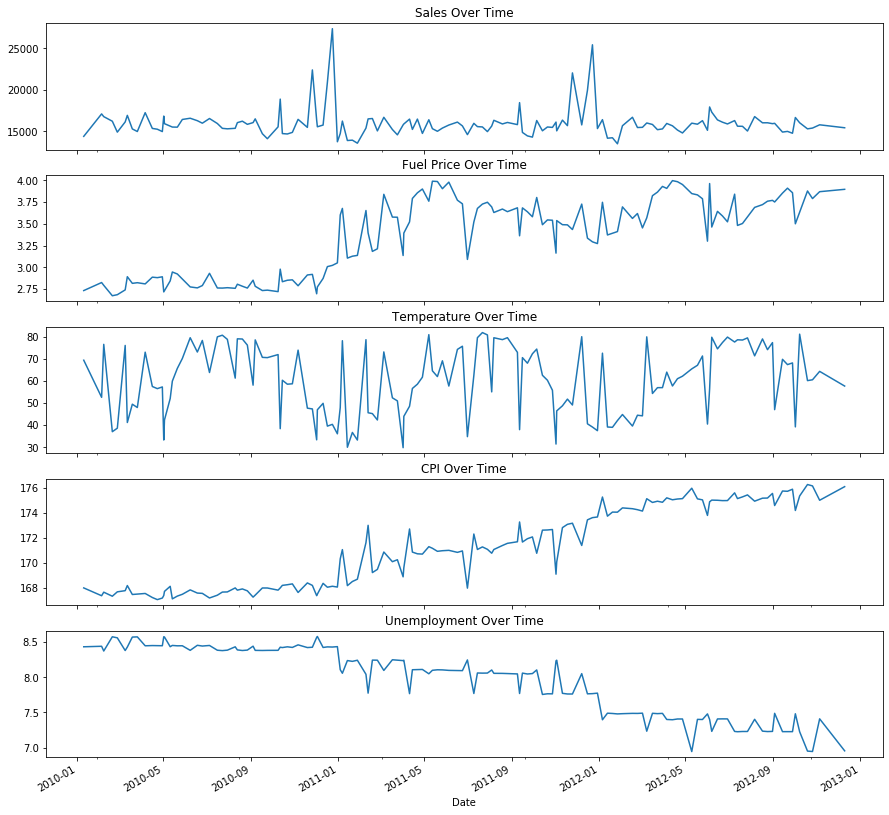

In [20]:
fig, ax = plt.subplots(5,1,figsize=(15,15),sharex=True) 
date_insights['Weekly_Sales'].plot(ax=ax[0],title="Sales Over Time")
date_insights['Fuel_Price'].plot(ax=ax[1],title="Fuel Price Over Time")
date_insights['Temperature'].plot(ax=ax[2],title="Temperature Over Time")
date_insights['CPI'].plot(ax=ax[3],title="CPI Over Time")
date_insights['Unemployment'].plot(ax=ax[4],title="Unemployment Over Time")

Fuel Price and CPI has been trending up whereas Unemployment has been going down
Temperature shows no particular trendTemperature shows no particular trend

# Correlation Matrix

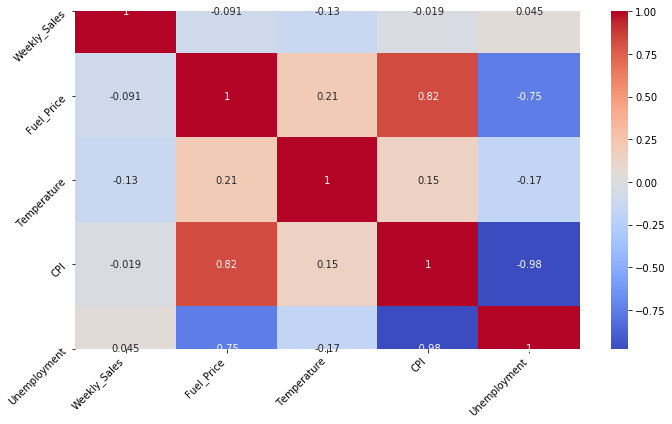

In [21]:
corr = date_insights.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=45)               # Rotate y-axis labels if needed
plt.tight_layout()                   # Adjust layout to prevent clipping
plt.show()

Fuel Price and CPI show a positive correlation whereas CPI and Fuel Price shows a negative correlation to unemployment

# Store Analysis

In [22]:
store_insights = sales[['Store','Date','Weekly_Sales']]
store_insights = store_insights.groupby(['Store']).agg({'Weekly_Sales':'mean'}).reset_index()
store_insights = store_insights.merge(stores, how = 'left', on ='Store')
#sns.boxplot(data = store_insights,y="Weekly_Sales",x="Type")
#store_insights.Weekly_Sales = store_insights.Weekly_Sales/1000000
store_insights.head(10)

,Store,Weekly_Sales,Type,Size
0,1,21710.543621,A,151315
1,2,26898.070031,A,202307
2,3,6373.033983,B,37392
3,4,29161.210415,A,205863
4,5,5053.415813,B,34875
5,6,21913.243624,A,202505
6,7,8358.766148,B,70713
7,8,13133.014768,A,155078
8,9,8772.890379,B,125833
9,10,26332.303819,B,126512


C:\Users\divya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Size by Store Type')

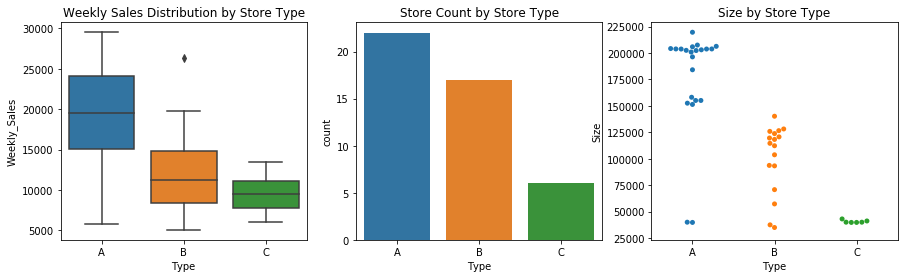

In [23]:
fig,ax = plt.subplots(1,3,figsize=(15, 4))
sns.boxplot(data = store_insights,y="Weekly_Sales",x="Type", ax = ax[0])
ax[0].set_title('Weekly Sales Distribution by Store Type')
sns.countplot(store_insights.Type, ax = ax[1])
ax[1].set_title('Store Count by Store Type')
sns.swarmplot(data = store_insights, y = "Size", x = "Type", ax = ax[2])
ax[2].set_title('Size by Store Type')

Store Type A shows the highest weekly sales with the largest number of stores and size in this category

# Department Analysis

In [24]:
total_dept = df[['Year','Type','Dept','Store','Weekly_Sales']].groupby(['Year','Type', 'Store']).agg({'Dept':'nunique','Weekly_Sales':'mean'}).reset_index()
total_dept = total_dept[['Year','Type','Dept','Weekly_Sales']].groupby(['Year','Type']).agg({'Dept':'sum','Weekly_Sales':'mean'}).reset_index()
total_dept

,Year,Type,Dept,Weekly_Sales
0,2010,A,1622,19858.833160
1,2010,B,1234,12453.586333
2,2010,C,341,9617.357753
3,2011,A,1634,19639.668953
4,2011,B,1250,12030.012057
5,2011,C,361,9460.366898
6,2012,A,1619,19356.199529
7,2012,B,1235,11750.482959
8,2012,C,362,9662.946349


Text(0.5, 1.0, 'Dept Count over Time and Store Type')

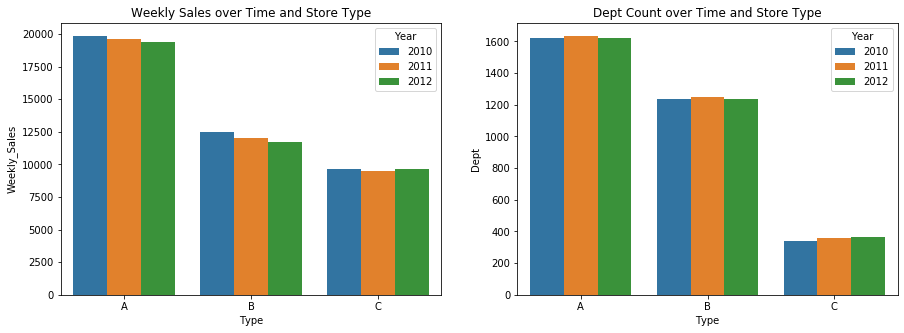

In [26]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(data=total_dept, x = 'Type', y ='Weekly_Sales', hue = 'Year', ax = ax[0])
ax[0].set_title('Weekly Sales over Time and Store Type')
sns.barplot(data=total_dept, x = 'Type', y ='Dept', hue = 'Year', ax = ax[1])
ax[1].set_title('Dept Count over Time and Store Type')

Type has been going upWeekly Sales for Type A and B has gone down a little over the years
whereas the number of dept in Type C has been going up